# IODA-targeted workflow notebook from mzML

**Purpose**: This notebook generates table with target ions formatted for XCalibur and MaxQuant.Live. It accepts as input one mzTab file from one sample data. The ions detected will be added the target ion list. If you need to generate a mzTab, we recommend using the dedicated [IODA targeted-from-mzML notebook](IODA_targeted_from_mzML.ipynb) using TOPPAS/OpenMS. 

**Documentation**: Please refer to the documentation page for more informations on the TOPPAS/OpenMS for IODA targeted-from-mzTab worklow. [See here](link).

**Instructions**: 
- Provide the mzTab for the sample data to be used. 
- Modify the variables below as needed.

In [1]:
#Automate that in the Binder env
from IODA_targeted_workflow import *
from IODA_run_OpenMS_targeted import *

============================

### Step 1 - Provide the input mzTab file

#### Method 1 
Upload your mzTab with the Jupyter lab interface (left vertical panel: File / Upload icon).

#### Method 2
We support downloading the mzTab file from the following cloud sharing services:
- **Google Drive** : obtain the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').

**Specificy the mzTab file name/path or sharing link in the *input_filename* variable in the cell below**. (The string must be between parenthesis).

In [2]:
input_BLANK = "https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
input_SAMPLE = "https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"

In [3]:
a_file = open('TOPPAS_Workflow/toppas_targeted_workflow_qOrbitrap_positive.toppas', "r")
list_of_lines = a_file.readlines()

In [9]:
!ls TOPPAS_Workflow
!cd TOPPAS_Workflow && /openms-build/bin/ExecutePipeline -in "TOPPAS_Workflow/toppas_targeted_workflow_qOrbitrap_positive.toppas" -out_dir "toppas_output"

logfile_IODA_from_mzML_2020-07-11.txt
toppas_Exclusion_workflow.toppas
toppas_input
toppas_output
toppas_targeted_workflow_qOrbitrap_positive.toppas
Error: File not found (the file 'TOPPAS_Workflow/toppas_targeted_workflow_qOrbitrap_positive.toppas' could not be found)
Cannot read input file given from parameter '-in'!


In [4]:
list_of_lines[43]

'            <ITEM name="mass_error_ppm" value="10.0" type="double" description="Allowed mass deviation (in ppm)." required="false" advanced="false" />\n'

In [5]:
ppm_error = 10
narrow_feature_noise = 1E5
feature_noise = 5E5
IODA_targeted_workflow(input_BLANK,input_SAMPLE,ppm_error,feature_noise)

[I 200711 05:35:13 IODA_run_OpenMS_targeted:28] 2020-07-11 05:35:13.201973
[I 200711 05:35:13 IODA_run_OpenMS_targeted:35] These are the path to the input files: 
[I 200711 05:35:13 IODA_run_OpenMS_targeted:36] Blank: https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 200711 05:35:13 IODA_run_OpenMS_targeted:37] Blank: https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 200711 05:35:13 IODA_run_OpenMS_targeted:53] This is the input file path: https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML


Starting the IODA-Exclusion workflow from a mzML file
Getting the mzML, please wait ...


[I 200711 05:35:14 IODA_run_OpenMS_targeted:53] This is the input file path: https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 200711 05:35:15 IODA_run_OpenMS_targeted:70]    ppm error = 10
[I 200711 05:35:15 IODA_run_OpenMS_targeted:71]    noise threshold = 500000.0


Changing variables of the OpenMS workflow
wget https://github.com/lfnothias/IODA_MS/raw/targeted_draft/TOPPAS_Workflow/toppas_targeted_workflow_qOrbitrap_positive.toppas -O TOPPAS_Workflow/toppas_targeted_workflow_qOrbitrap_positive.toppas
            <ITEM name="noise_threshold_int" value="1.05e05" type="double" description="Intensity threshold below which peaks are regarded as noise." required="false" advanced="false" />

            <ITEM name="mass_error_ppm" value="10.0" type="double" description="Allowed mass deviation (in ppm)." required="false" advanced="false" />

            <ITEM name="noise_threshold_int" value="1.05e05" type="double" description="Intensity threshold below which peaks are regarded as noise." required="false" advanced="false" />

            <ITEM name="mass_error_ppm" value="10.0" type="double" description="Allowed mass deviation (in ppm)." required="false" advanced="false" />

Initializing the TOPPAS/OpenMS workflow
Running the TOPPAS/OpenMS workflow, this

In [7]:
input_filename = 'https://drive.google.com/file/d/1NGVzhrw-xZ4nMJserIQ7v4tYgcmraZ6g/view?usp=sharing'
#input_filename = 'tests/Euphorbia/Targeted/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab'

============================
### Step 2 - Specify the variables for the workflow
**Specify the variables for targeted workflow in the cell below**

*ratio_value*: the minimum ratio for the intensity of an ion between the sample and the blank (sample/blank). Only ions above that ratio will be valid ion targets. (Default = 5).

*min_intensity_value*: the minimum intensity of an ion in the sample (peak height) to be considered as valid ion targets. (Default = 1E5).

*experiment_number*: define the number of iterative experiments to perform for the IODA-targeted workflow. The valid target ions will be splitted into (multiple) experiments (Default = 3, range 1-10)


In [8]:
ratio_value = 5
min_intensity_value = 1E5
experiment_number = 3

============================
### Step 3 - Run the cell below

Beside running the cell below, no action is needed.

In [9]:
make_targeted_list_from_mzTab(input_filename, experiment_number, ratio_value, min_intensity_value)

[I 200711 04:40:38 IODA_targeted_workflow:274] 2020-07-11 04:40:38.670933
[I 200711 04:40:38 IODA_targeted_workflow:281]  ==== RUNNING ====
[I 200711 04:40:38 IODA_targeted_workflow:282] Starting the IODA targeted-from-mzTab workflow
[I 200711 04:40:38 IODA_targeted_workflow:284] ======
[I 200711 04:40:38 IODA_targeted_workflow:285] Getting the mzTab
[I 200711 04:40:38 IODA_targeted_workflow:289] This is the Google Drive download link:https://drive.google.com/file/d/1NGVzhrw-xZ4nMJserIQ7v4tYgcmraZ6g/view?usp=sharing
[I 200711 04:40:38 IODA_targeted_workflow:303] ======
[I 200711 04:40:38 IODA_targeted_workflow:304] Converting mzTab to table format
[I 200711 04:40:41 IODA_targeted_workflow:73] - For sample Euphorbia_rogers_latex_Blank_MS1_2uL the sum of feature intensities is = 666624119.59375
[I 200711 04:40:41 IODA_targeted_workflow:75] - For sample Euphorbia_rogers_latex_latex_MS1_2uL the sum of feature intensities = 57488959891.234375
[I 200711 04:40:41 IODA_targeted_workflow:306] =

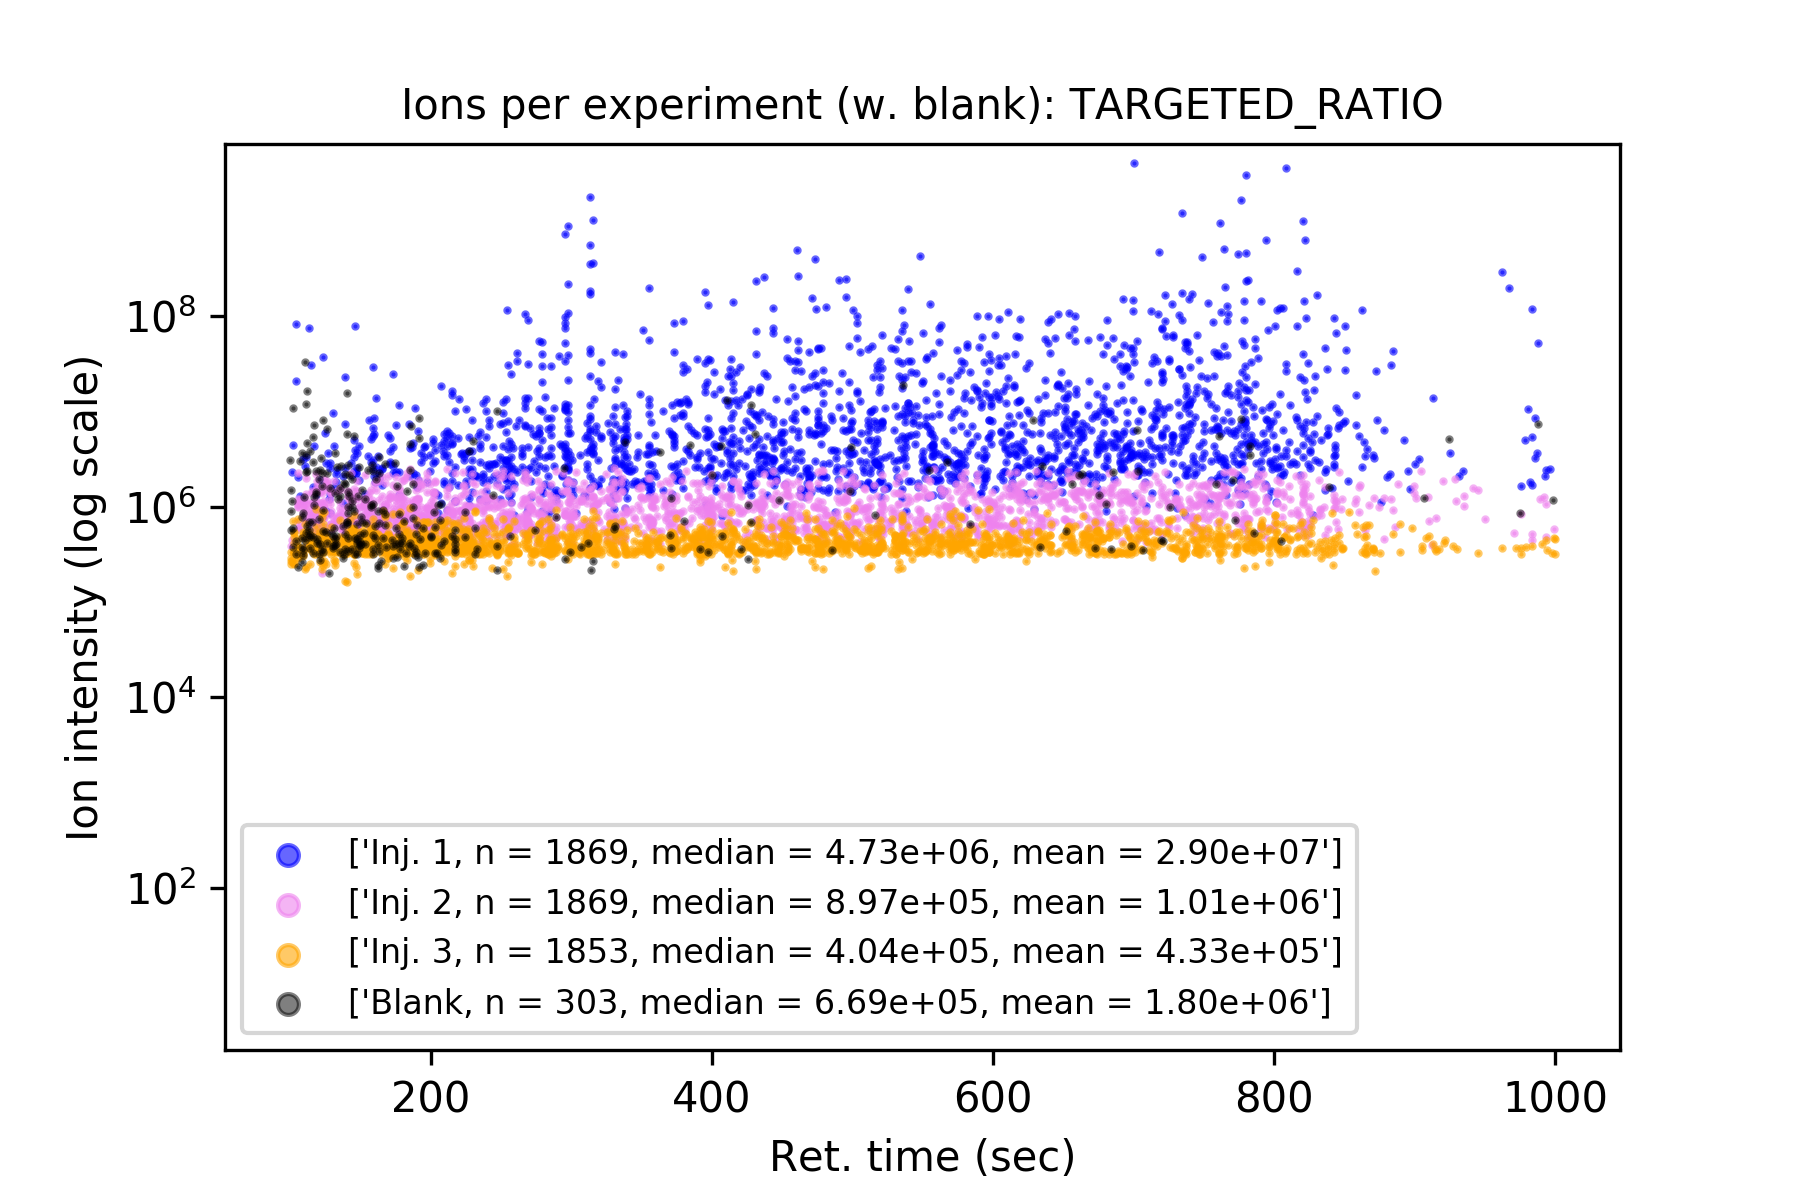

In [5]:
from IPython.display import Image
Image("results_targeted/intermediate_files/injection_blank_shared_TARGETED_RATIO_scatter_view.png")

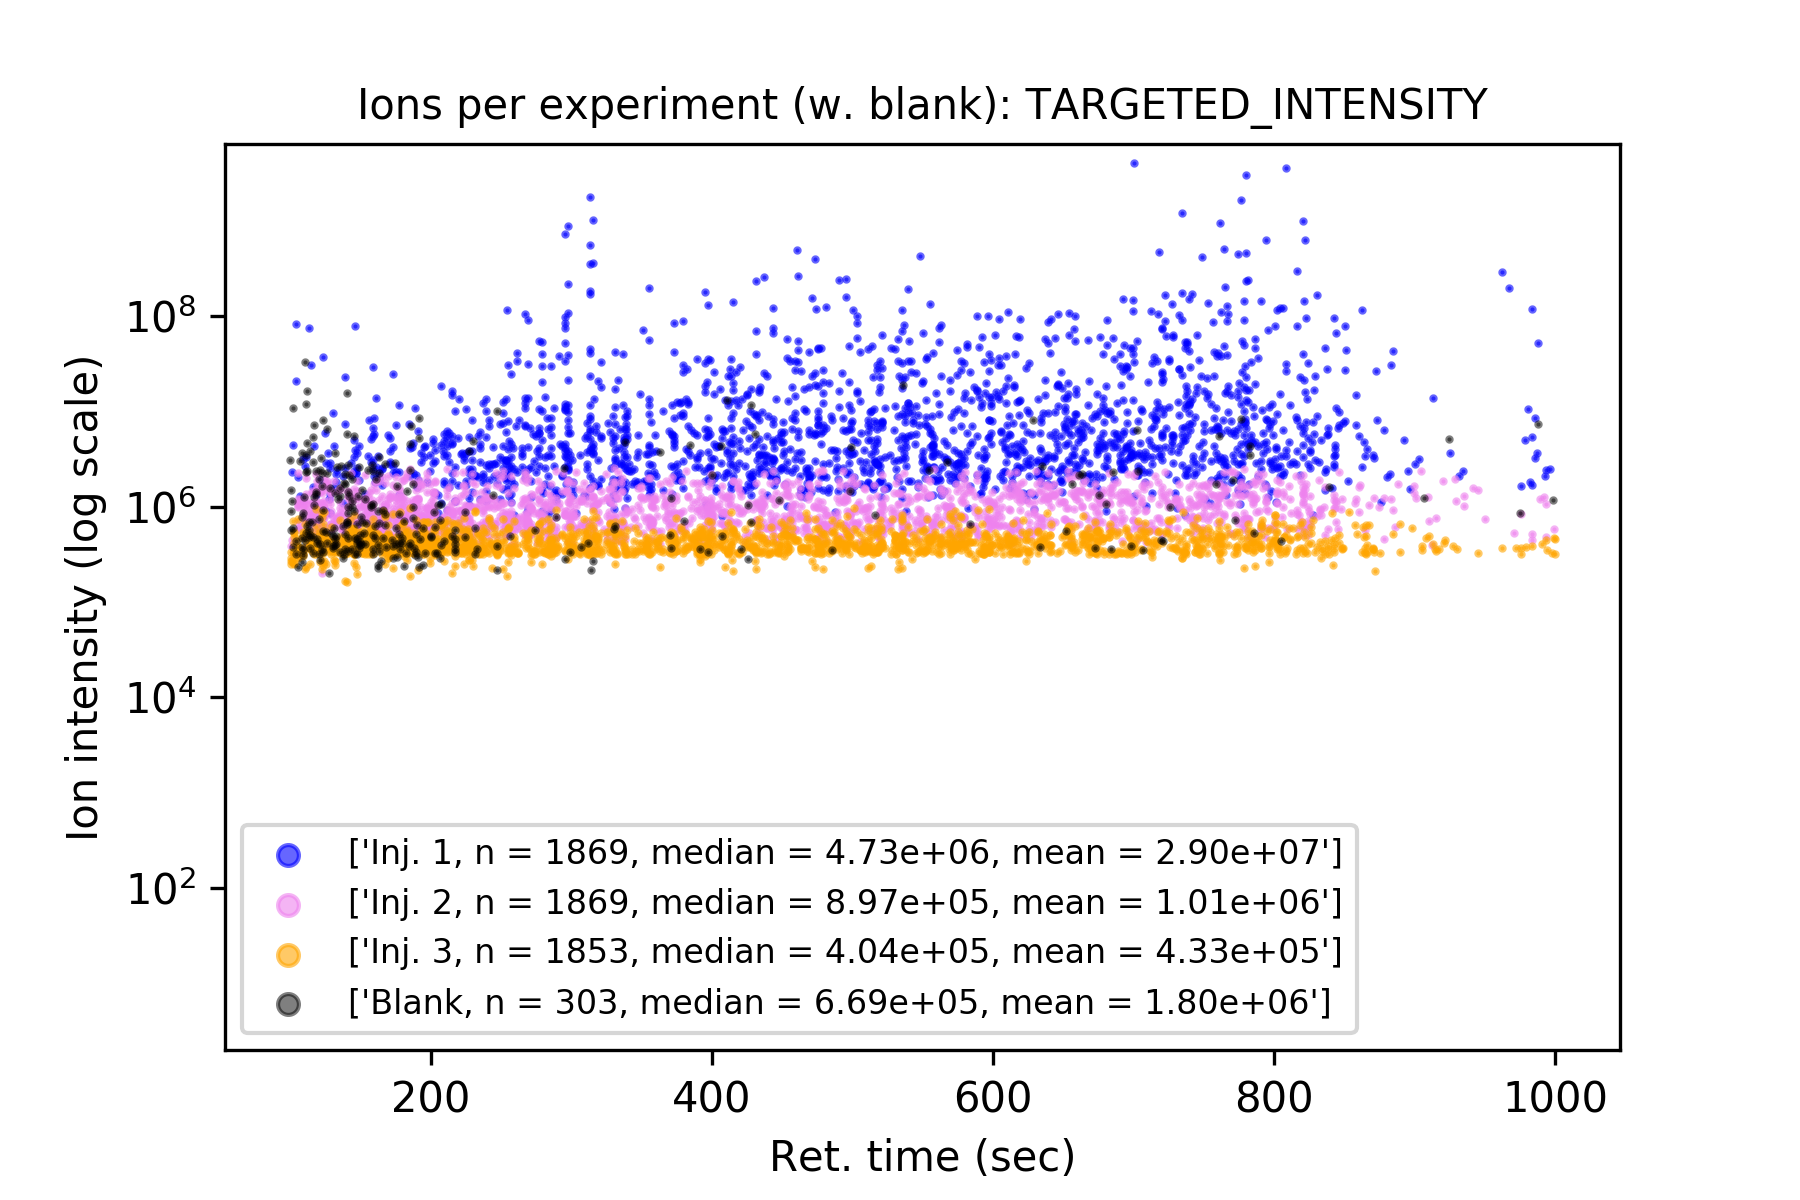

In [6]:
Image("results_targeted/intermediate_files/injection_blank_shared_TARGETED_INTENSITY_scatter_view.png")

============================
### Step 4 - Examine the results

- Examine the IODA-targeted worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the mzTab file (such as with TOPPAS/OpenMS).

### Step 5 - Download the results

Download the result file at
[download-results/IODA_targeted_results.zip](download-results/IODA_targeted_from_mzTab.zip?download=1)

### Step 6 - Prepare your acquisition method
For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).